In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
# from sklearn.externals import joblib
print('Libraries Imported')

Libraries Imported


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
dataset = pd.read_excel('Features_2500RPM_15dB.xlsx')

### 4-Class Classification

In [26]:
X = dataset.iloc[:, :-14].values
y_14 = dataset.iloc[:,-1].values
y_4 = dataset.iloc[:,-2].values
y_OHE = y_4

In [27]:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(sparse=False)
# y_OHE = pd.get_dummies(y_OHE)
# onehot = encoder.fit_transform(y_OHE)
# print(onehot)

In [28]:
from sklearn.model_selection import train_test_split
X_OHE_train, X_OHE_test, y_OHE_train, y_OHE_test = train_test_split(X, y_OHE, test_size = 0.2, random_state = 0)  

In [29]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_OHE_train = sc.fit_transform(X_OHE_train)
# X_OHE_test = sc.transform(X_OHE_test)
# X_OHE_train

### Constructing & Training Random Forest

In [35]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 84, criterion = 'entropy', random_state = 0)
classifier.fit(X_OHE_train, y_OHE_train)

RandomForestClassifier(criterion='entropy', n_estimators=84, random_state=0)

In [36]:
y_pred = classifier.predict(X_OHE_test)

In [37]:
# class_labels = list(y_OHE_test)
# y_OHE_test = y_OHE_test.to_numpy()
# type(y_OHE_test)
# y_OHE_test

In [38]:
# y_OHE_test.shape

In [39]:
# from sklearn.metrics import confusion_matrix, accuracy_score
# cm = confusion_matrix(y_OHE_test.argmax(axis=1), y_pred.argmax(axis=1))

In [40]:
# cm

In [42]:
 y_predt=classifier.predict(X_OHE_train)

In [43]:
accuracy_score(y_OHE_train, y_predt)

1.0

In [44]:
accuracy_score(y_OHE_test, y_pred)

0.9928571428571429

In [24]:
np.shape(class_labels)

(4,)

In [25]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn.metrics

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

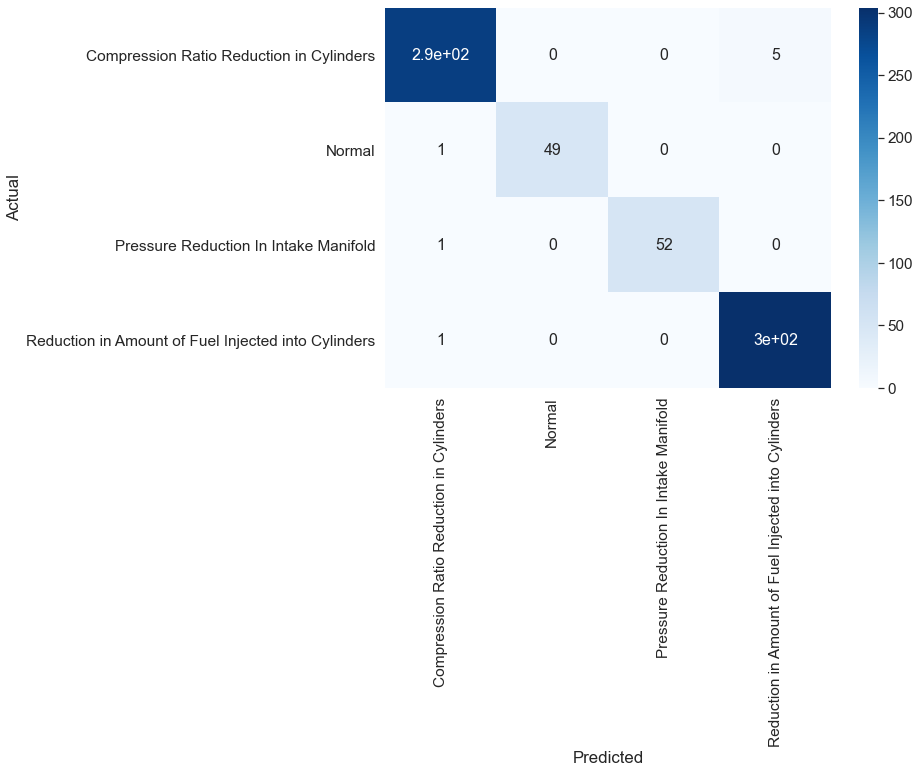

In [16]:
df_cm = pd.DataFrame(cm, columns=class_labels, index = class_labels)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [17]:
df_cm

Predicted,Compression Ratio Reduction in Cylinders,Normal,Pressure Reduction In Intake Manifold,Reduction in Amount of Fuel Injected into Cylinders
Actual,,,,
Compression Ratio Reduction in Cylinders,287,0,0,5
Normal,1,49,0,0
Pressure Reduction In Intake Manifold,1,0,52,0
Reduction in Amount of Fuel Injected into Cylinders,1,0,0,304


### 14-Class Classification

In [18]:
y_14 = dataset.iloc[:,-1].values
y_OHE = y_14

In [42]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
y_OHE = pd.get_dummies(y_OHE)
onehot = encoder.fit_transform(y_OHE)
print(onehot.shape)

(3500, 28)


In [20]:
from sklearn.model_selection import train_test_split
X_OHE_train, X_OHE_test, y_OHE_train, y_OHE_test = train_test_split(X, y_OHE, test_size = 0.2, random_state = 0)  

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_OHE_train = sc.fit_transform(X_OHE_train)
X_OHE_test = sc.transform(X_OHE_test)


In [22]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 84, criterion = 'entropy', random_state = 0)
classifier.fit(X_OHE_train, y_OHE_train)

RandomForestClassifier(criterion='entropy', n_estimators=84, random_state=0)

In [23]:
y_pred = classifier.predict(X_OHE_test)

In [24]:
class_labels = list(y_OHE_test)
y_OHE_test = y_OHE_test.to_numpy()
type(y_OHE_test)

numpy.ndarray

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_OHE_test.argmax(axis=1), y_pred.argmax(axis=1))
cm

array([[66,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0, 40,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 50,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0, 48,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 49,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0, 51,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0, 55,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 55,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 42,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 49]],
      dtype=int64)

In [26]:
accuracy_score(y_OHE_test, y_pred)

0.9585714285714285

In [27]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn.metrics

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

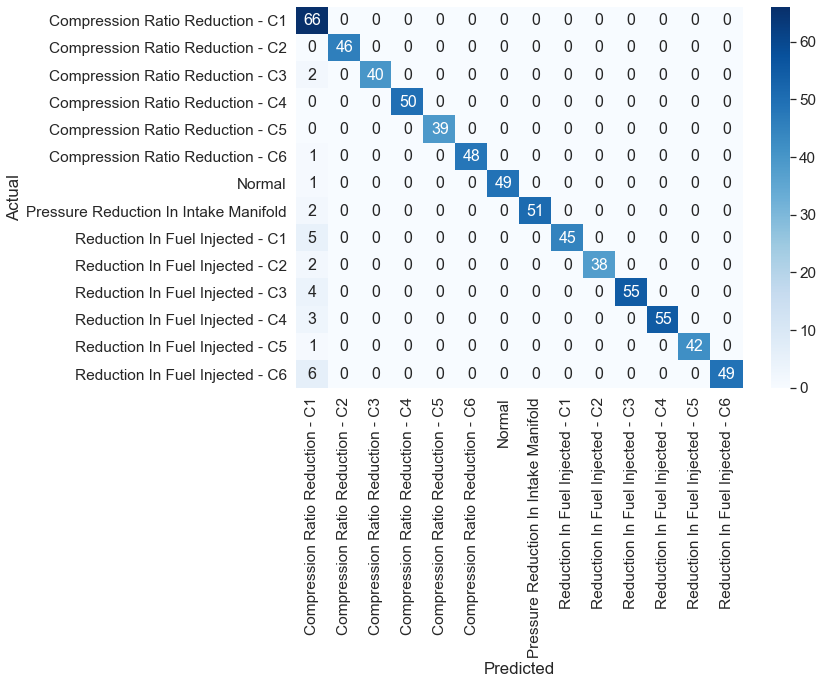

In [28]:
df_cm = pd.DataFrame(cm, columns=class_labels, index = class_labels)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

### 5-Fold CV

In [29]:
X_OHE = X

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_OHE = sc.fit_transform(X_OHE)

In [30]:
type(X_OHE)

numpy.ndarray

In [31]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X_OHE, y_14):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 2800, Test set:700
Fold:2, Train set: 2800, Test set:700
Fold:3, Train set: 2800, Test set:700
Fold:4, Train set: 2800, Test set:700
Fold:5, Train set: 2800, Test set:700


In [32]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(RandomForestClassifier(n_estimators = 84, criterion = 'entropy', random_state = 0), X_OHE, y_14, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.4f}".format(score.mean())}')


Scores for each fold are: [0.97857143 0.98285714 0.98428571 0.98571429 0.98      ]
Average score: 0.9823


In [33]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(RandomForestClassifier(n_estimators = 84, criterion = 'entropy', random_state = 0), X_OHE, y_4, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.4f}".format(score.mean())}')


Scores for each fold are: [0.98714286 0.98857143 0.98571429 0.99285714 0.99142857]
Average score: 0.9891
